# Insurance Fraud Detection


## 1. Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pyspark.sql import SparkSession

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## 2. Loading Data


In [2]:
# Creating a Spark session
spark = SparkSession.builder.appName("InsuranceFraudDetection").getOrCreate()
spark

In [3]:
# Loading data using PySpark
spark_df = spark.read.csv('./data/insurance_claims.csv',
                          header=True, inferSchema=True)

In [4]:
# Converting PySpark DataFrame to Pandas DataFrame
df = spark_df.toPandas()
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,None
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,None
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,None
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,None
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int32  
 1   age                          1000 non-null   int32  
 2   policy_number                1000 non-null   int32  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int32  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int32  
 9   insured_zip                  1000 non-null   int32  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [7]:
df = pd.read_csv('./data/insurance_claims.csv')

## 3. Data Preprocessing


In [8]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan
df.replace('?', np.nan, inplace=True)

In [9]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

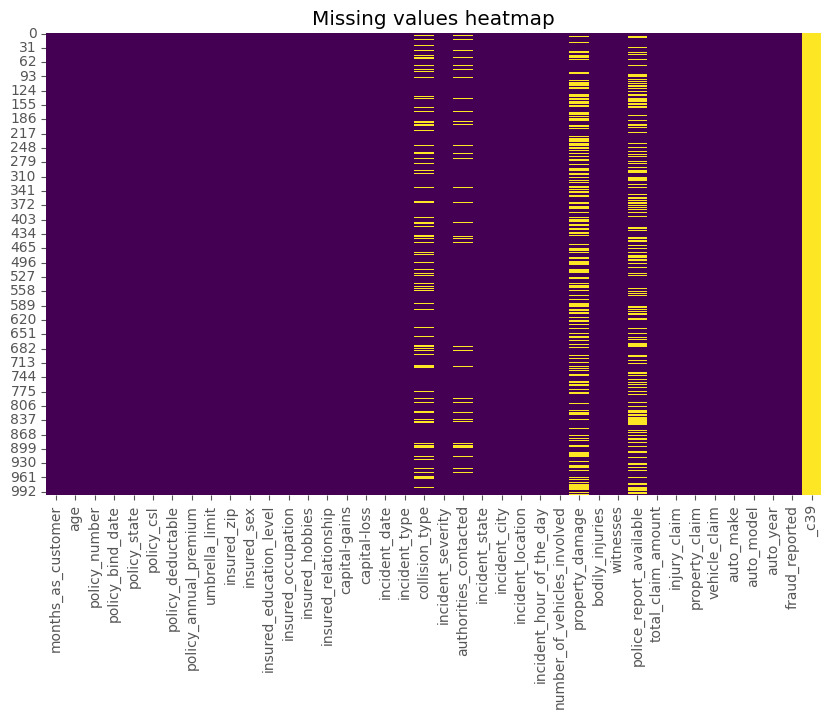

In [10]:
# Missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing values heatmap')
plt.show()

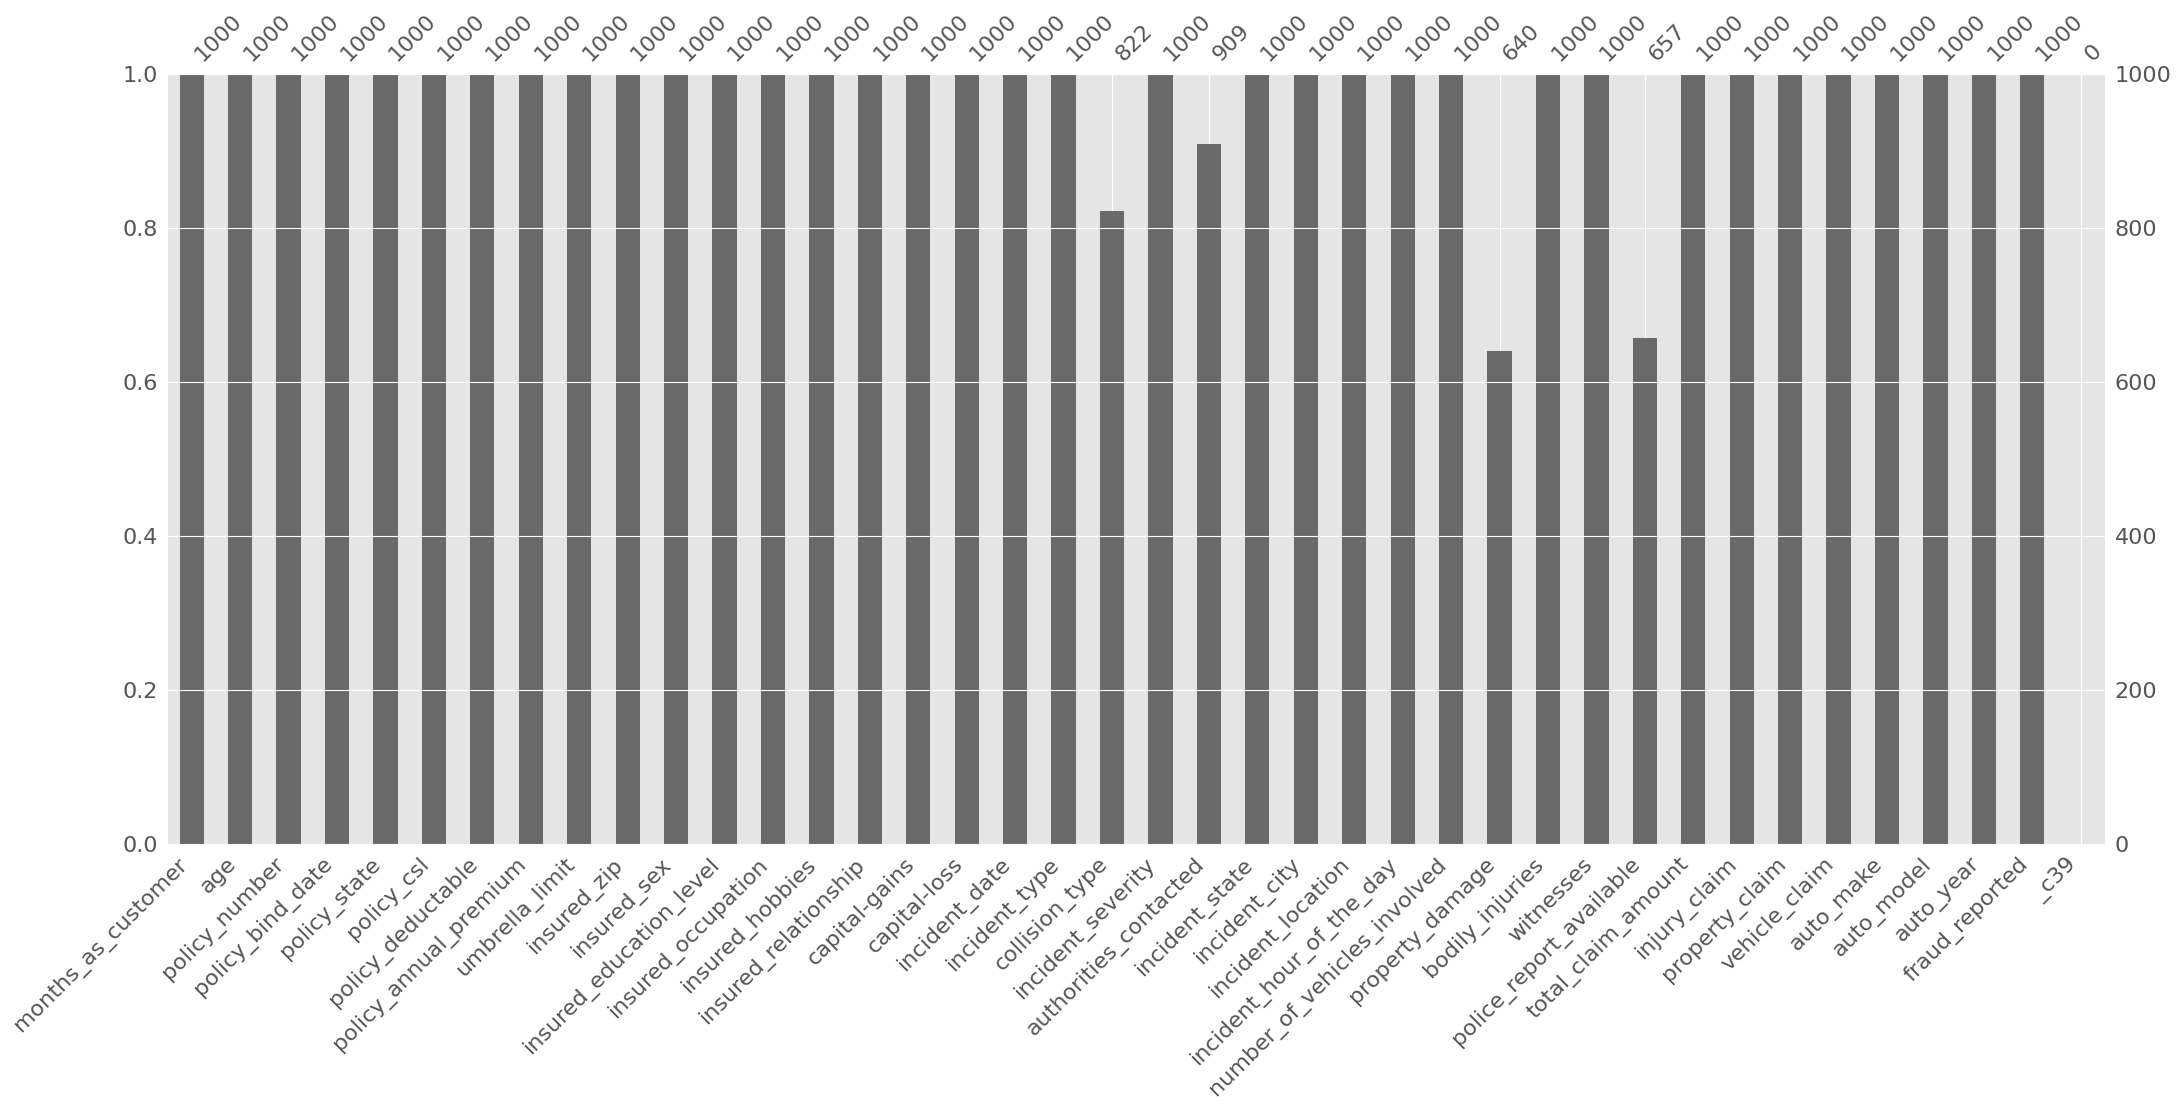

In [11]:
# Alternate visualization of missing values
import missingno as msno

msno.bar(df)
plt.show()

### Handling missing values


In [12]:
df['collision_type'] = df['collision_type'].fillna(
    df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(
    df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(
    df['police_report_available'].mode()[0])
df['authorities_contacted'] = df['authorities_contacted'].fillna(
    df['authorities_contacted'].mode()[0])

df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

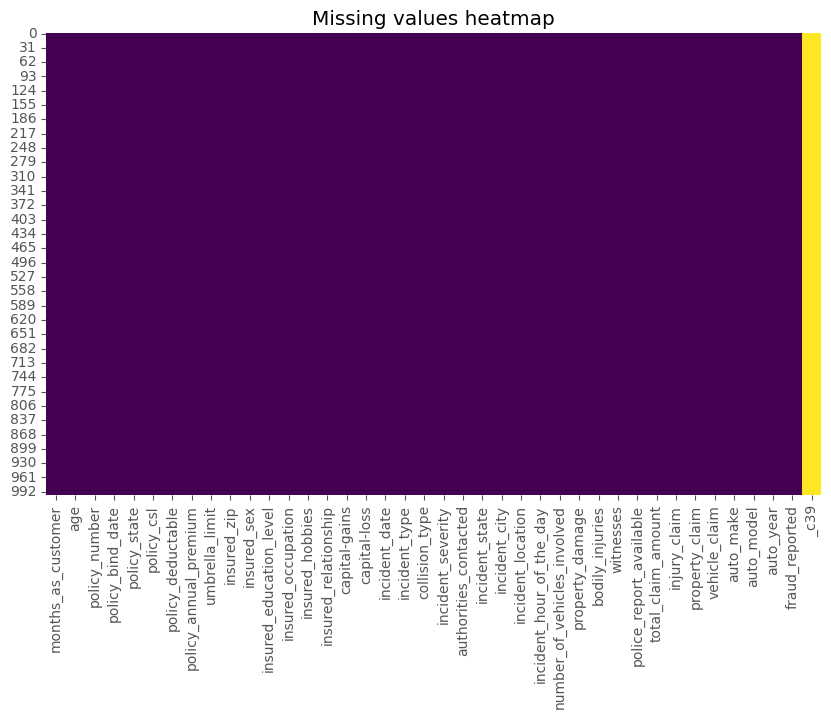

In [13]:
# Missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing values heatmap')
plt.show()

## 4. Exploratory Data Analysis


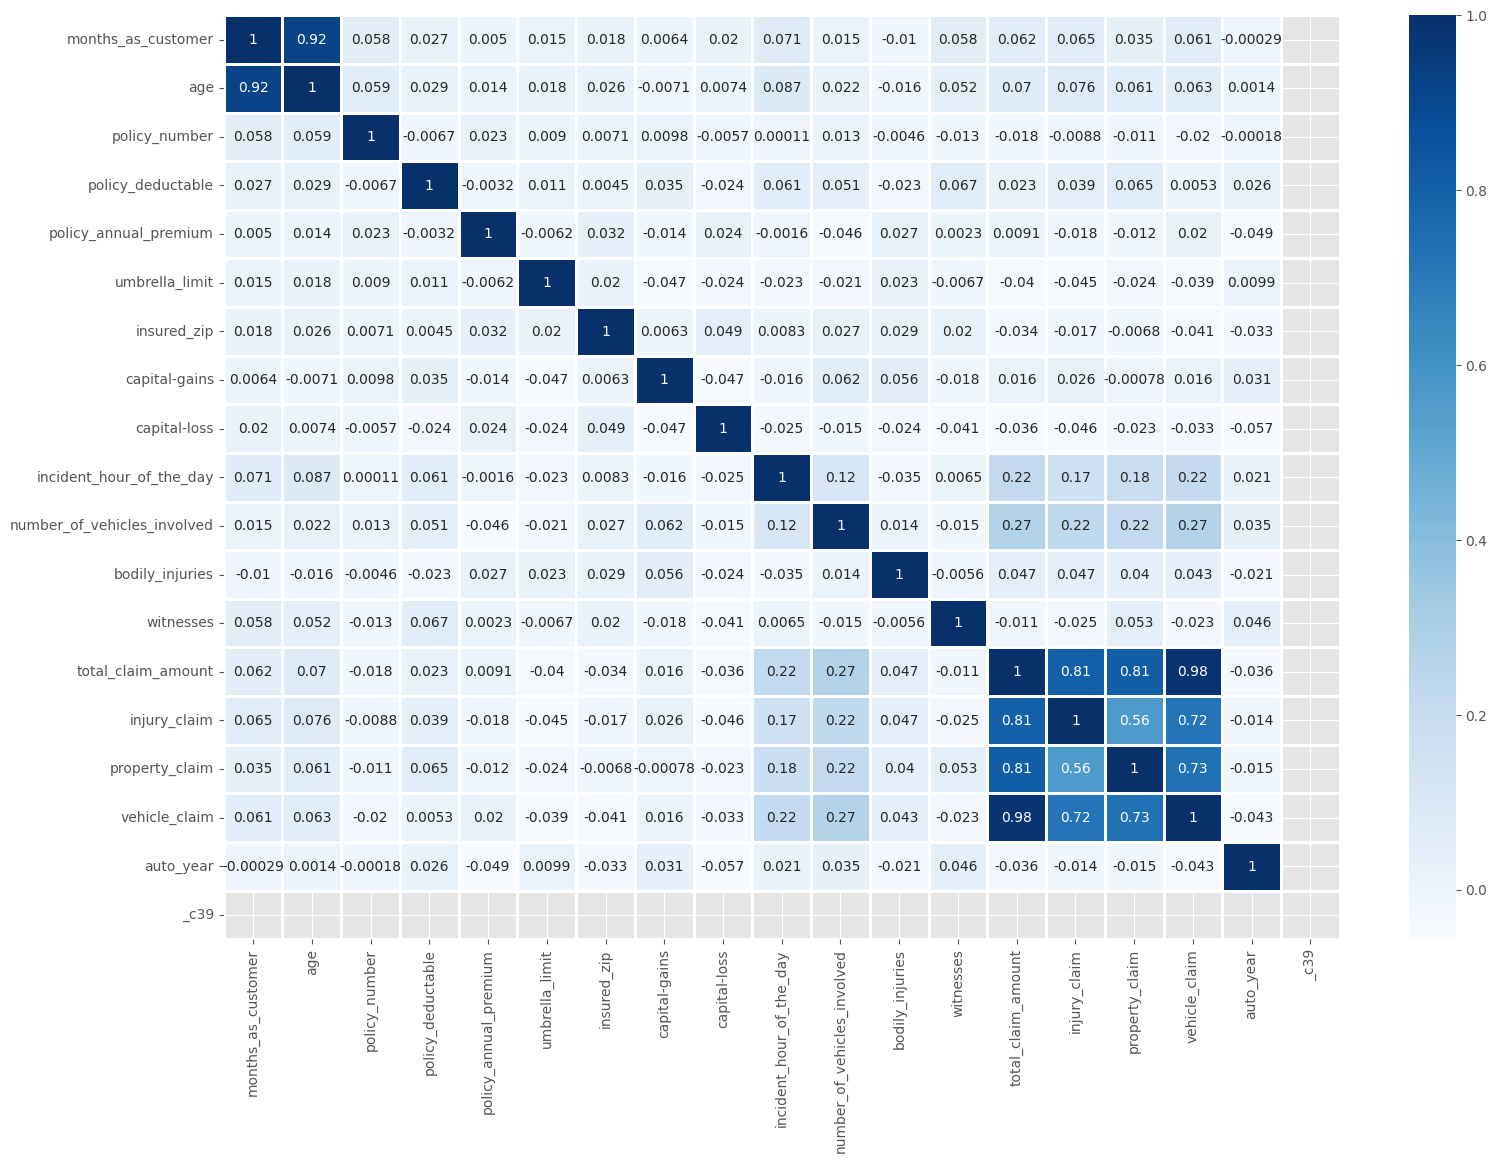

In [14]:
# Correlation heatmap

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(18, 12))
corr = numeric_df.corr()
sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1, cmap='Blues')
plt.show()

In [15]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [16]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number', 'policy_bind_date', 'policy_state',
           'insured_zip', 'incident_location', 'incident_date',
           'incident_state', 'incident_city', 'insured_hobbies',
           'auto_make', 'auto_model', 'auto_year', '_c39']

df = df.drop(to_drop, axis=1)

In [17]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


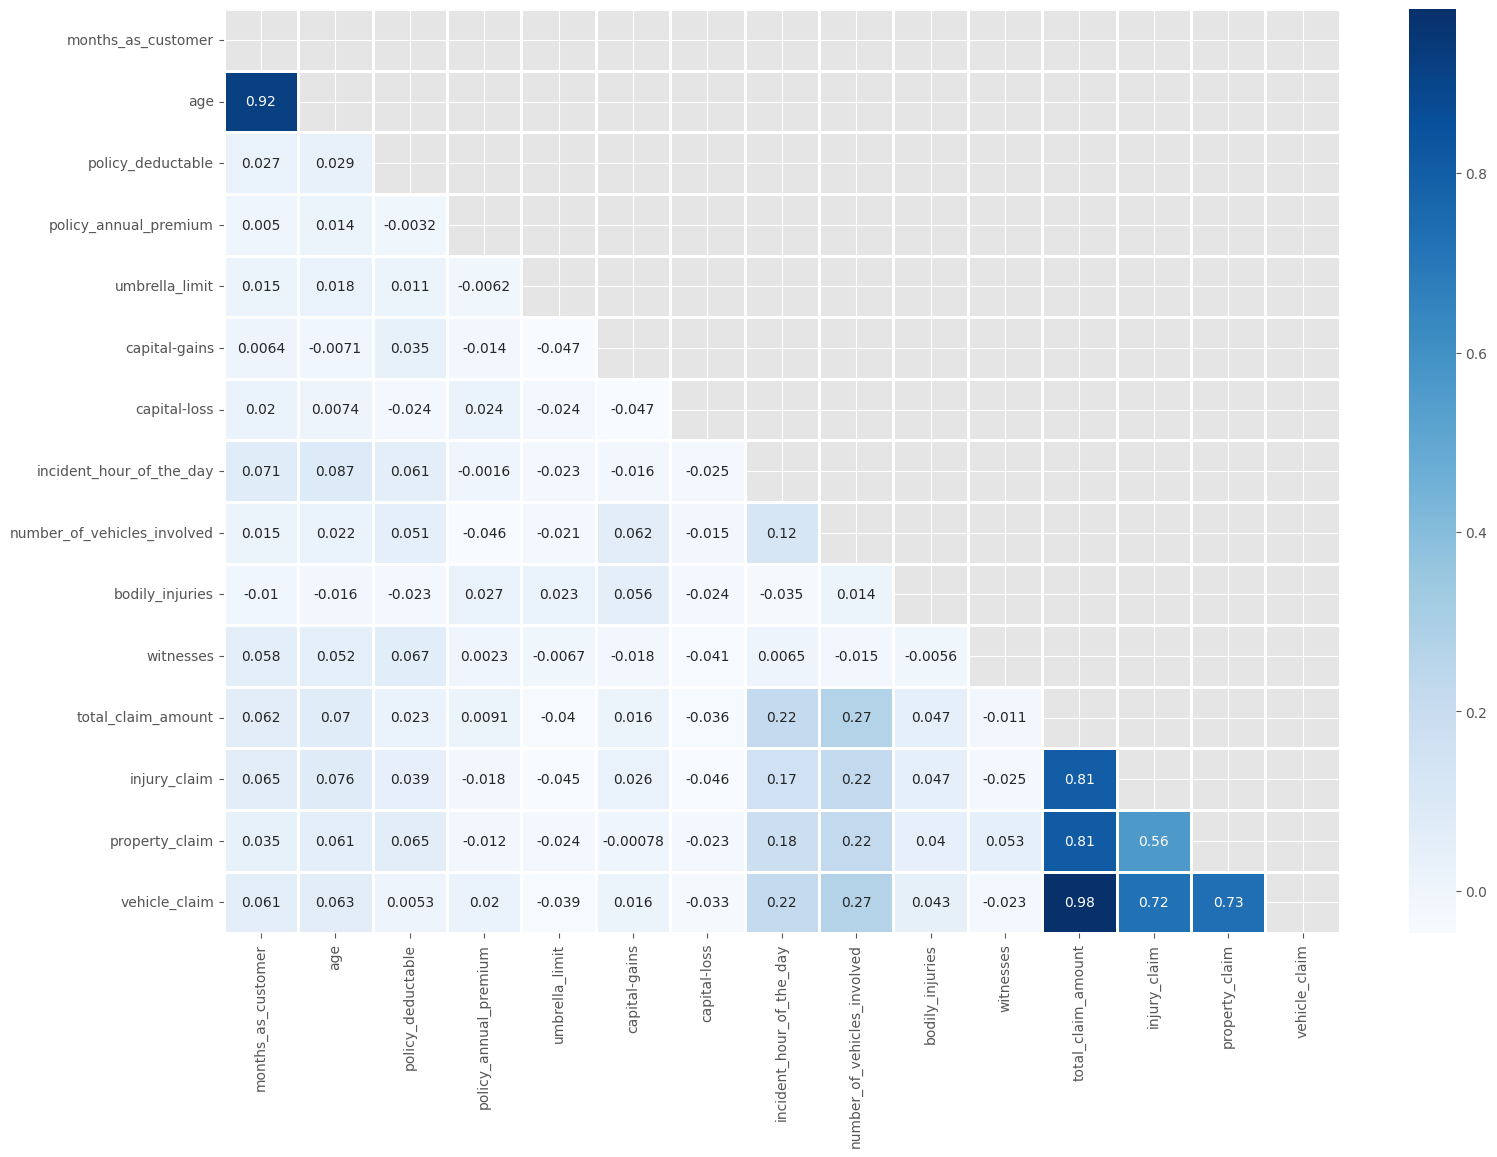

In [18]:
# checking for multicollinearity

numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

plt.figure(figsize=(18, 12))

corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data=corr, mask=mask, annot=True,
            fmt='.2g', linewidth=1, cmap='Blues')
plt.show()

From the above plot, we can see that there is high correlation between `age` and `months_as_customer`.We will drop the "Age" column. Also there is high correlation between `total_claim_amount`, `injury_claim`, `property_claim`, `vehicle_claim` as total claim is the sum of all others. So we will drop the total claim column.


In [19]:
df = df.drop(columns=['age', 'total_claim_amount'], axis=1)
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

### Splitting into X & y


In [21]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (1000, 24)
y shape: (1000,)


### Encoding categorical columns


In [22]:
# extracting categorical columns
cat_df = X.select_dtypes(include=['object'])
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO


In [23]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [24]:
cat_df = pd.get_dummies(cat_df, drop_first=True)
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False


In [25]:
# extracting the numerical columns
num_df = X.select_dtypes(include=['int64'])
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [26]:
# combining the Numerical and Categorical dataframes to get the final dataset
X = pd.concat([num_df, cat_df], axis=1)
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,True,False,True,False,False,False,False,True,False,False


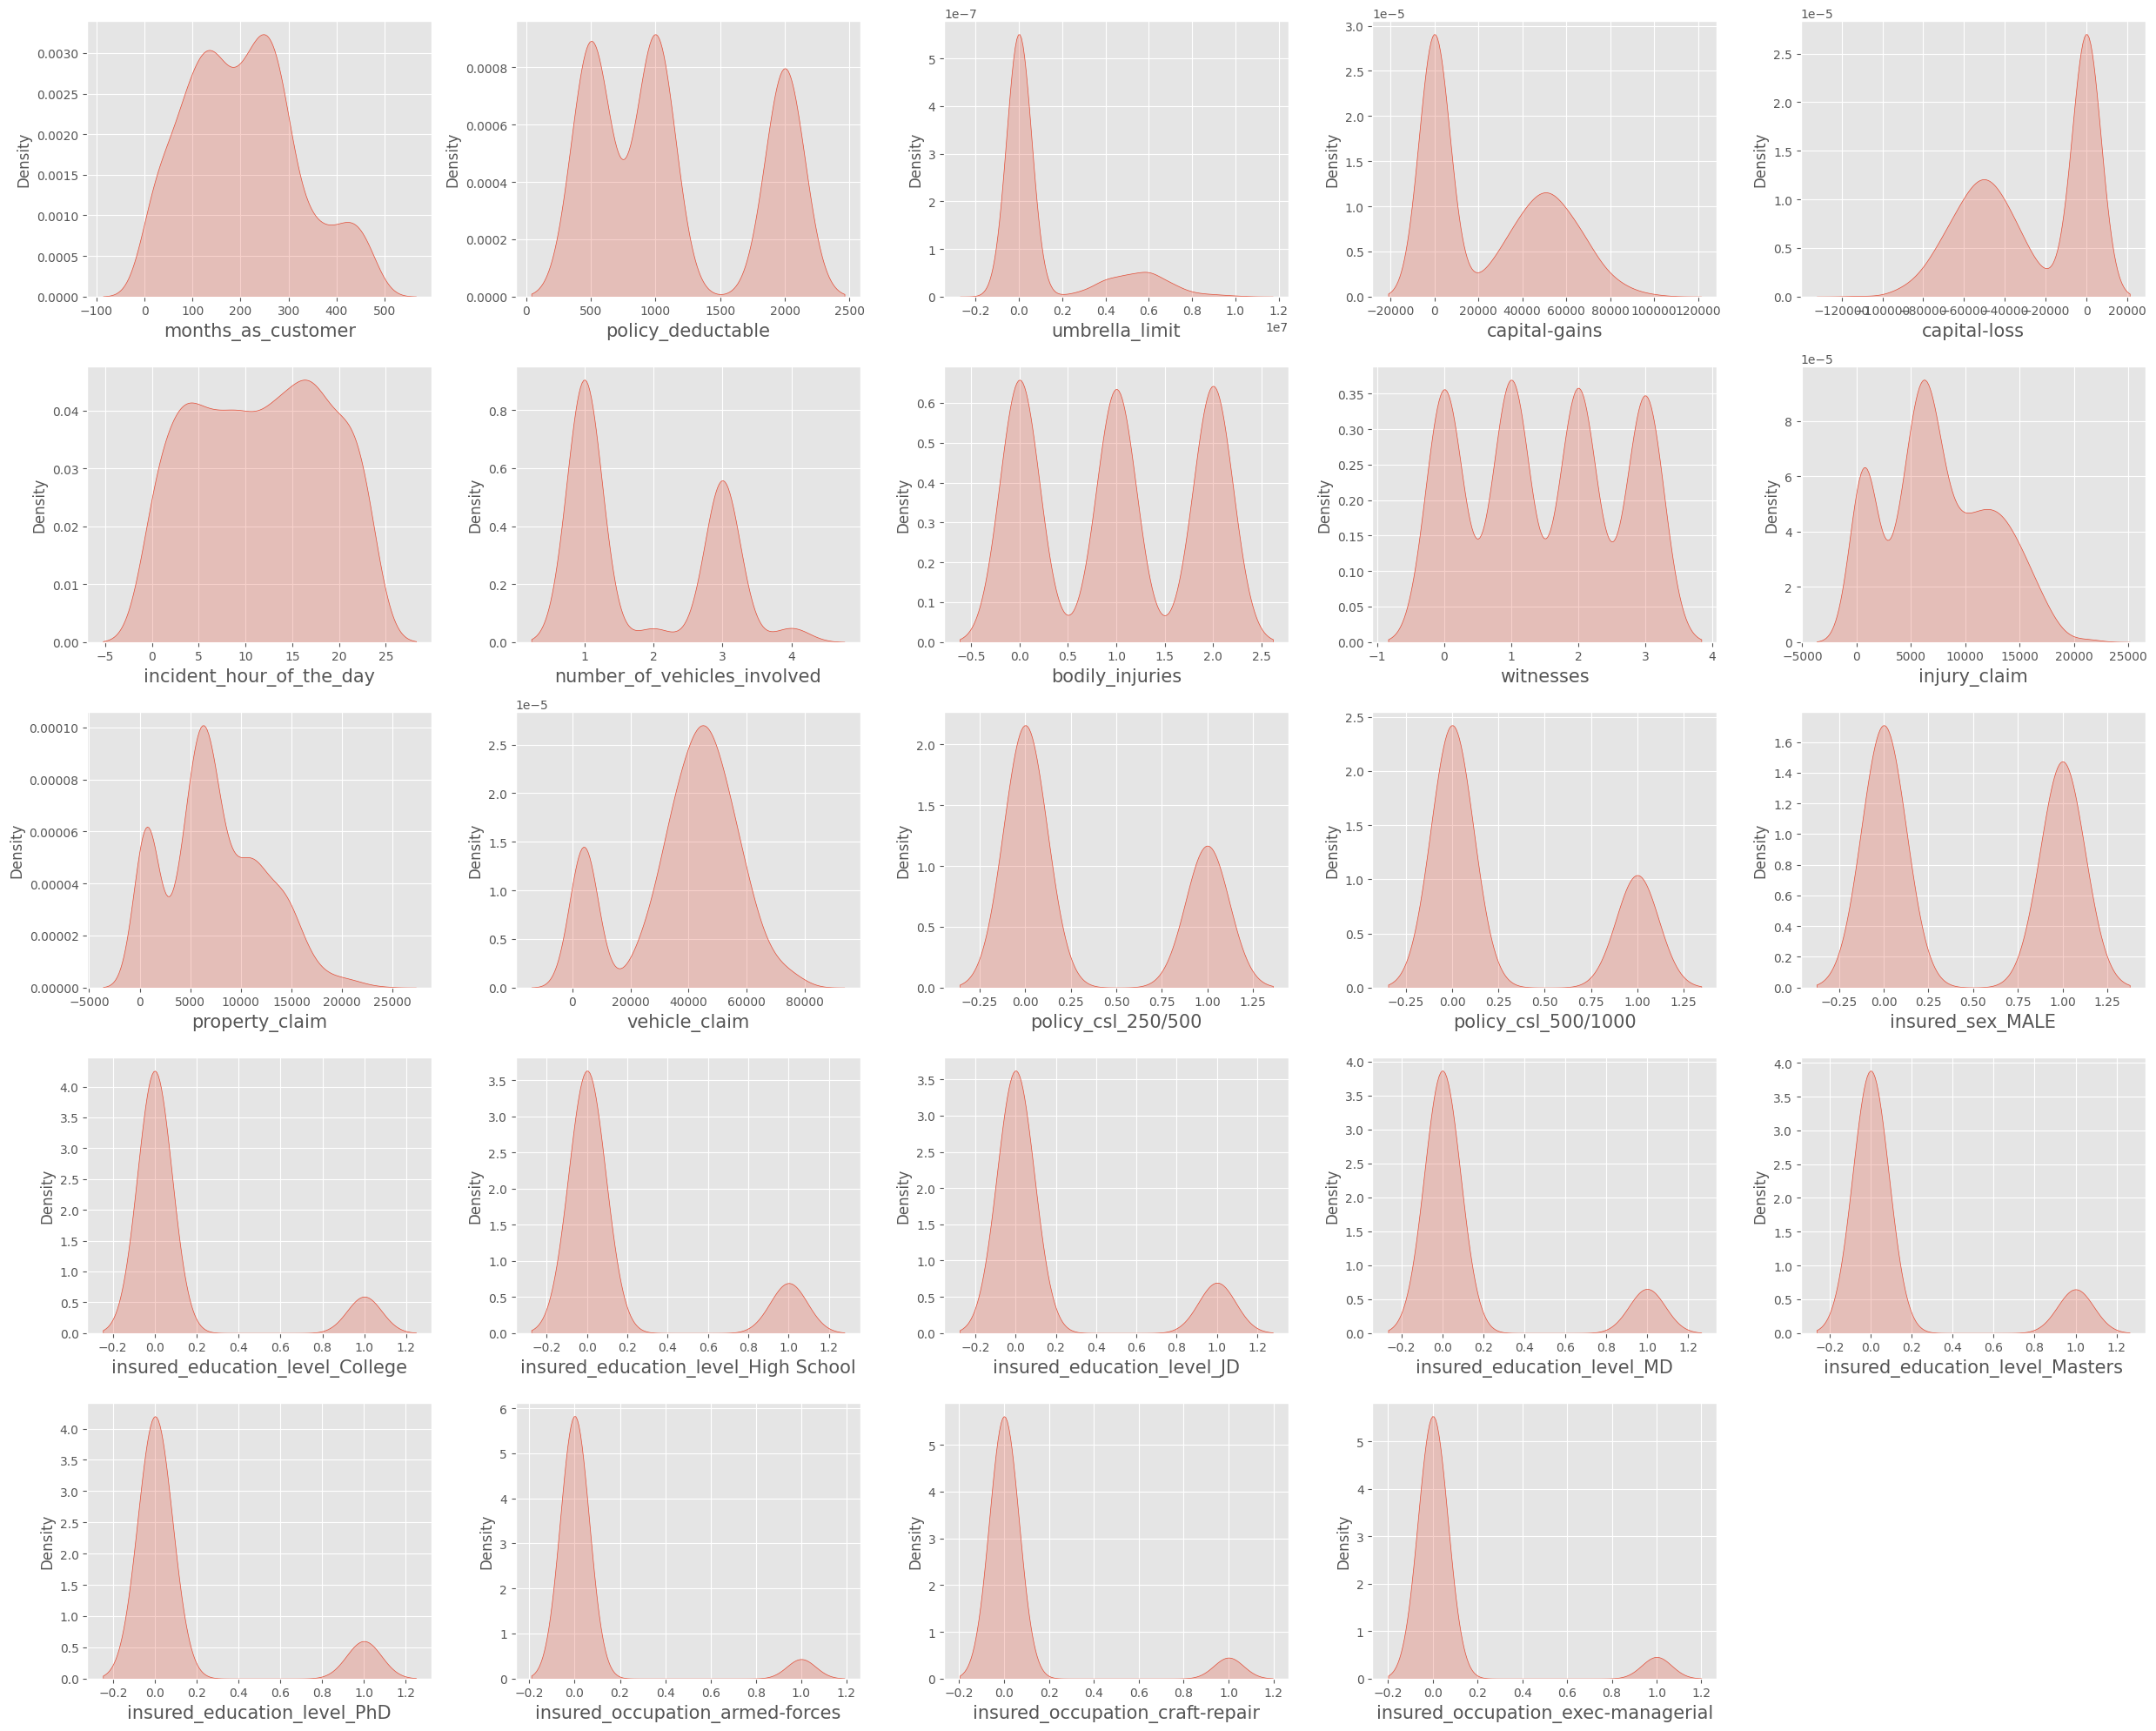

In [27]:
plt.figure(figsize=(25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.kdeplot(X[col], fill=True)
        plt.xlabel(col, fontsize=15)

    plotnumber += 1

plt.tight_layout()
plt.show()

Data looks good, let's check for outliers.


### Outliers Detection


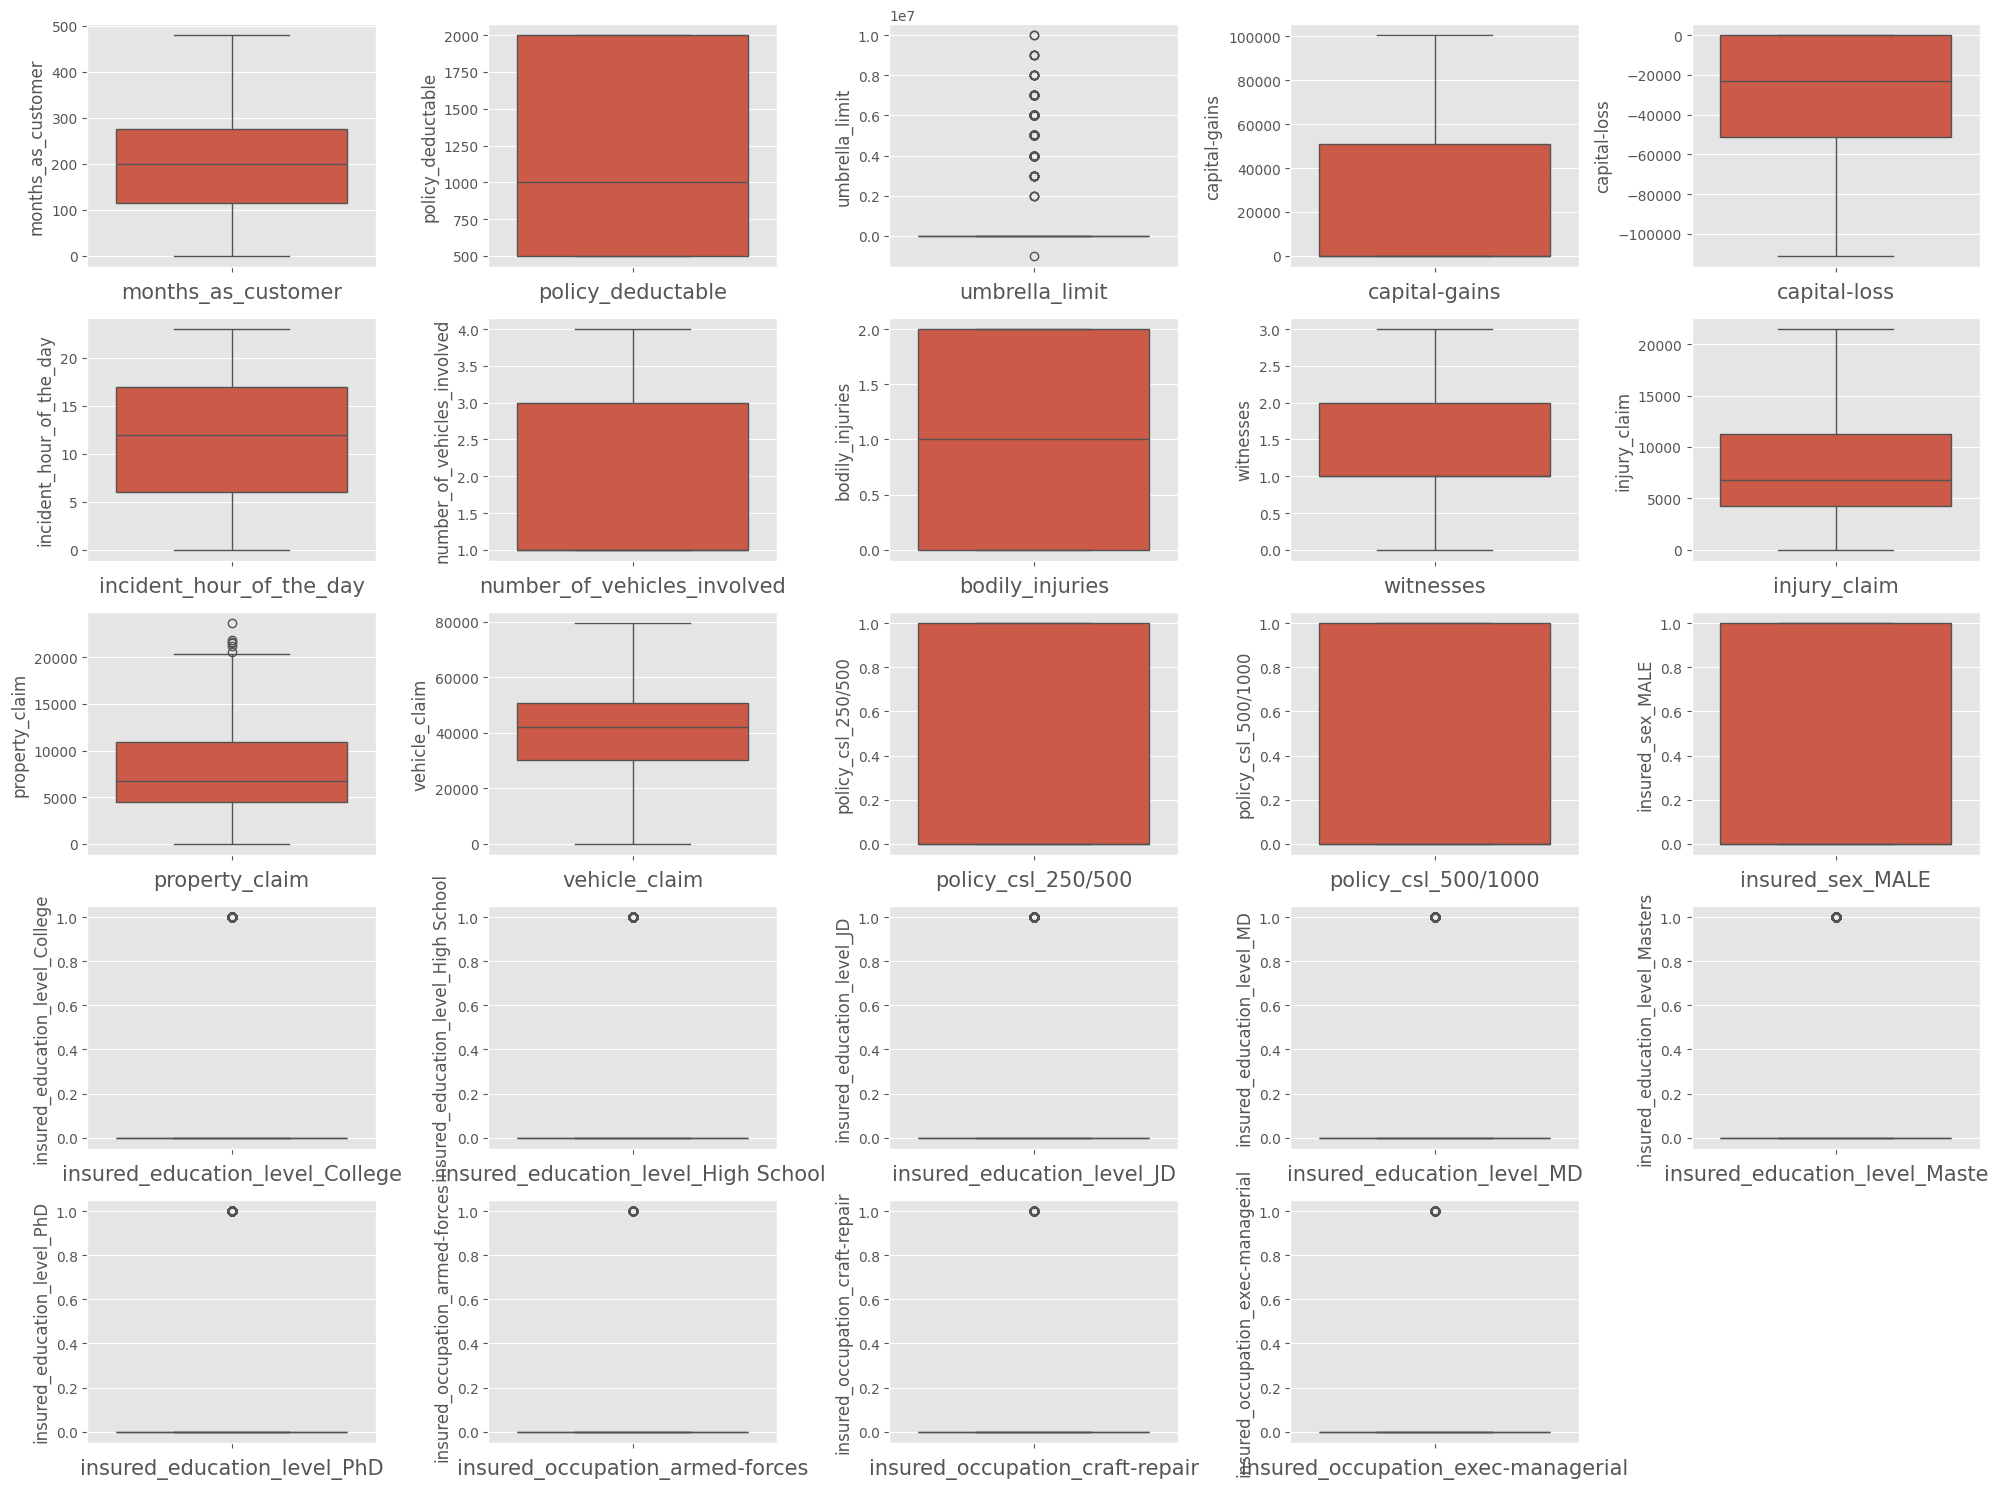

In [28]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize=15)

    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns. We will scale numerical columns later.


### Splitting into train & test set


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (750, 52)
X_test shape: (250, 52)
y_train shape: (750,)
y_test shape: (250,)


In [30]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
                  'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                  'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
                  'vehicle_claim']]

In [31]:
# Scaling the numeric values in the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [32]:
scaled_num_df = pd.DataFrame(
    data=scaled_data, columns=num_df.columns, index=X_train.index)


scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
82,-1.121799,-0.221938,2.107854,-0.920144,0.959487,-1.234470,-0.807865,1.223135,0.480740,-1.388146,-1.234046,-1.752479
991,0.436820,-0.221938,-0.487315,1.185551,-0.195657,1.332588,-0.807865,-1.216629,-0.409519,-1.541465,-0.462710,0.181309
789,-0.329429,-1.037886,-0.487315,-0.920144,-1.106858,-1.662313,-0.807865,-1.216629,-1.299778,0.040790,-0.742630,-0.595702
894,-1.409142,-1.037886,-0.487315,-0.920144,0.959487,-0.806627,-0.807865,0.003253,1.370998,-1.337039,-1.337720,-1.818687
398,-1.748730,-1.037886,-0.487315,-0.920144,-0.740943,-0.664012,-0.807865,-1.216629,-0.409519,-1.422898,-1.484938,-1.907670


In [33]:
# dropping the unscaled columns
X_train = X_train.drop(columns=scaled_num_df.columns)
# concatenating the scaled columns


X_train = pd.concat([scaled_num_df, X_train], axis=1)


X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
82,-1.121799,-0.221938,2.107854,-0.920144,0.959487,-1.234470,-0.807865,1.223135,0.480740,-1.388146,...,True,False,True,False,False,False,False,True,True,False
991,0.436820,-0.221938,-0.487315,1.185551,-0.195657,1.332588,-0.807865,-1.216629,-0.409519,-1.541465,...,True,False,False,True,False,False,True,False,False,False
789,-0.329429,-1.037886,-0.487315,-0.920144,-1.106858,-1.662313,-0.807865,-1.216629,-1.299778,0.040790,...,True,False,True,False,False,True,False,False,False,True
894,-1.409142,-1.037886,-0.487315,-0.920144,0.959487,-0.806627,-0.807865,0.003253,1.370998,-1.337039,...,True,False,True,False,False,False,False,True,False,False
398,-1.748730,-1.037886,-0.487315,-0.920144,-0.740943,-0.664012,-0.807865,-1.216629,-0.409519,-1.422898,...,True,False,False,False,True,False,False,True,False,True


## 5. Model Building


In [34]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
# scaling the test data
scaled_test_data = scaler.transform(X_test[scaled_num_df.columns])
scaled_test_df = pd.DataFrame(
    data=scaled_test_data, columns=scaled_num_df.columns, index=X_test.index)
X_test = X_test.drop(columns=scaled_num_df.columns)
X_test = pd.concat([scaled_test_df, X_test], axis=1)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%\n")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy: 73.60%

Confusion Matrix: 
[[174   9]
 [ 57  10]]

Classification Report: 
              precision    recall  f1-score   support

           N       0.75      0.95      0.84       183
           Y       0.53      0.15      0.23        67

    accuracy                           0.74       250
   macro avg       0.64      0.55      0.54       250
weighted avg       0.69      0.74      0.68       250

